In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df1 = pd.read_csv('alzheimers_aging.csv')
num_rows1 = len(df1)
print("The number of rows in this data set is:", num_rows1)
num_cols1 = len(df1.columns)
print("The number of columns in this data set is:", num_cols1)

The number of rows in this data set is: 284142
The number of columns in this data set is: 31


In [3]:
df1.dtypes

RowId                          object
YearStart                       int64
YearEnd                         int64
LocationAbbr                   object
LocationDesc                   object
Datasource                     object
Class                          object
Topic                          object
Question                       object
Data_Value_Unit                object
DataValueTypeID                object
Data_Value_Type                object
Data_Value                    float64
Data_Value_Alt                float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Low_Confidence_Limit          float64
High_Confidence_Limit         float64
StratificationCategory1        object
Stratification1                object
StratificationCategory2        object
Stratification2                object
Geolocation                    object
ClassID                        object
TopicID                        object
QuestionID                     object
LocationID  

In [4]:
unique_questions = df1['Question'].unique()
print("The number of unique questions is:", len(unique_questions))
unique_stratification1 = df1['Stratification1'].unique()
print("The age groups in the data set are:", unique_stratification1)
dataq0 = df1[df1['Question'] == unique_questions[0]]['Data_Value']

The number of unique questions is: 39
The age groups in the data set are: ['50-64 years' '65 years or older' 'Overall']


In [5]:
question_count = df1['Question'].value_counts()
print("The amount of times each question appeared in the data set is:", question_count)

The amount of times each question appeared in the data set is: Question
Percentage of older adults who are experiencing frequent mental distress                                                                                                     11092
Percentage of older adults who have not had any leisure time physical activity in the past month                                                                             11092
Physically unhealthy days (mean number of days in past month)                                                                                                                11092
Percentage of older adults with a lifetime diagnosis of depression                                                                                                           11092
Percentage of older adults who reported influenza vaccine within the past year                                                                                               11092
Percentage of older adults who ha

In [40]:
mode_questions = df1['Question'].mode()
print("The most often reoccuring questions asked were:")
print(mode_questions[0])
print(mode_questions[1])
print(mode_questions[2])
print(mode_questions[3])
print(mode_questions[4])
print(mode_questions[5])
print(mode_questions[6])
#mode_questions_percent = df1[df1['Data_Value_Unit'] == '%']['Question'].mode()

The most often reoccuring questions asked were:
Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more
Percentage of older adults who are experiencing frequent mental distress
Percentage of older adults who have not had any leisure time physical activity in the past month
Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days
Percentage of older adults who reported influenza vaccine within the past year
Percentage of older adults with a lifetime diagnosis of depression
Physically unhealthy days (mean number of days in past month)


In [7]:
df1['Data_Value_Unit'].value_counts()

Data_Value_Unit
%         262048
Number     22094
Name: count, dtype: int64

In [31]:
df1_percent = df1[df1['Data_Value_Unit'] == '%']['Data_Value']
df1_number = df1[df1['Data_Value_Unit'] == 'Number']['Data_Value']

question1_data = df1_percent[df1['Question'] == unique_questions[0]]
question22_data = df1_number[df1['Question'] == unique_questions[21]]

question1_max = df1_percent[df1['Question'] == unique_questions[0]].max()
question1_min = df1_percent[df1['Question'] == unique_questions[0]].min()

question22_max = df1_number[df1['Question'] == unique_questions[21]].max()
question22_min = df1_number[df1['Question'] == unique_questions[21]].min()

print("Question 1 is:", unique_questions[0])

print("The maximum percentage recorded for the first question is:", question1_max, "%")

print("The minimum percentage recorded for the first question is:", question1_min, "%")

print("Question 22 is:", unique_questions[21])

print("The maximum percentage recorded for the first question is:", question22_max, "days")

print("The minimum percentage recorded for the first question is:", question22_min, "days")


Question 1 is: Percentage of older adults who are experiencing frequent mental distress
The maximum percentage recorded for the first question is: 43.8 %
The minimum percentage recorded for the first question is: 0.9 %
Question 22 is: Mean number of days with activity limitations in the past month
The maximum percentage recorded for the first question is: 20.5 days
The minimum percentage recorded for the first question is: 1.7 days


In [33]:
question1_mean = df1_percent[df1['Question'] == unique_questions[0]].mean()
question1_median = df1_percent[df1['Question'] == unique_questions[0]].median()
question1_mode = df1_percent[df1['Question'] == unique_questions[0]].mode()

question22_mean = df1_number[df1['Question'] == unique_questions[21]].mean()
question22_median = df1_number[df1['Question'] == unique_questions[21]].median()
question22_mode = df1_number[df1['Question'] == unique_questions[21]].mode()

print("Question 1 is:", unique_questions[0])

print("The mean percentage recorded for question 1 is:", question1_mean, "%")
print("The median percentage recorded for question 1 is:", df1_percent_median, "%")
print("The mode percentages recorded for question 1 are:", df1_percent_mode, "%")

print("Question 22 is:", unique_questions[21])

print("The mean numerical value recorded for question 22 is:", df1_number_mean, "days")
print("The median numerical value recorded for question 22 is:", df1_number_median, "days")
print("The mode numerical values recorded for question 22 are:", df1_number_mode, "days")

Question 1 is: Percentage of older adults who are experiencing frequent mental distress
The mean percentage recorded for question 1 is: 10.96768947963801 %
The median percentage recorded for question 1 is: 35.4 %
The mode percentages recorded for question 1 are: 0    12.1
Name: Data_Value, dtype: float64 %
Question 22 is: Mean number of days with activity limitations in the past month
The mean numerical value recorded for question 22 is: 5.838641007052001 days
The median numerical value recorded for question 22 is: 5.7 days
The mode numerical values recorded for question 22 are: 0    6.0
Name: Data_Value, dtype: float64 days


In [34]:
question1_range = question1_max - question1_min
question1_midrange = (question1_max + question1_min)/2
question1_lower_quantile = question1_data.quantile(0.25)
question1_upper_quantile = question1_data.quantile(0.75)
question1_IQR = question1_upper_quantile - question1_lower_quantile
question1_variance = question1_data.var()
question1_sd = question1_data.std()

question22_range = question22_max - question22_min
question22_midrange = (question22_max + question22_min)/2
question22_lower_quantile = question22_data.quantile(0.25)
question22_upper_quantile = question22_data.quantile(0.75)
question22_IQR = question22_upper_quantile - question22_lower_quantile
question22_variance = question22_data.var()
question22_sd = question22_data.std()

print("Question 1 is:", unique_questions[0])

print("The range in the percentage data of question 1 is:", question1_range)
print("The midrange in the percentage data of question 1 is:", question1_midrange)
print("The lower quantile of the percentage data of question 1 is:", question1_lower_quantile)
print("The IQR of the percentage data of question 1 is:", question1_IQR)
print("The variance of the percentage data of question 1 is:", question1_variance)
print("The standard deviation of the percentage data of question 1 is:", question1_sd)

print("Question 22 is:", unique_questions[21])

print("The range in the numerical data values of question22 is:", question22_range)
print("The midrange in the numerical data values of question22 is:", question22_midrange)
print("The lower quantile of the numerical data values of question22 is:", question22_lower_quantile)
print("The IQR of the numerical data of question22 is:", question22_IQR)
print("The variance of the numerical data values of question22 is:", question22_variance)
print("The standard deviation of the numerical data values of question22 is:", question22_sd)

Question 1 is: Percentage of older adults who are experiencing frequent mental distress
The range in the percentage data of question 1 is: 42.9
The midrange in the percentage data of question 1 is: 22.349999999999998
The lower quantile of the percentage data of question 1 is: 8.2
The IQR of the percentage data of question 1 is: 4.9
The variance of the percentage data of question 1 is: 15.499401364177244
The standard deviation of the percentage data of question 1 is: 3.936927909446304
Question 22 is: Mean number of days with activity limitations in the past month
The range in the numerical data values of question22 is: 18.8
The midrange in the numerical data values of question22 is: 11.1
The lower quantile of the numerical data values of question22 is: 5.6
The IQR of the numerical data of question22 is: 1.5
The variance of the numerical data values of question22 is: 1.7749626867419501
The standard deviation of the numerical data values of question22 is: 1.3322772559576141


In [35]:
#Another way of obtaining some of this data
print(question1_data.describe())
print(question22_data.describe())

count    7072.000000
mean       10.967689
std         3.936928
min         0.900000
25%         8.200000
50%        10.400000
75%        13.100000
max        43.800000
Name: Data_Value, dtype: float64
count    7336.000000
mean        6.427576
std         1.332277
min         1.700000
25%         5.600000
50%         6.300000
75%         7.100000
max        20.500000
Name: Data_Value, dtype: float64


In [36]:
question1_lower_point = question1_lower_quantile - (question1_IQR * 1.5)
question1_upper_point = question1_upper_quantile + (question1_IQR * 1.5)
question1_lower_outliers = question1_data[(question1_data < question1_lower_point)]
question1_upper_outliers = question1_data[(question1_data > question1_upper_point)]
question1_outliers = [question1_lower_outliers, question1_upper_outliers]

question22_lower_point = question22_lower_quantile - (question22_IQR * 1.5)
question22_upper_point = question22_upper_quantile + (question22_IQR * 1.5)
question22_lower_outliers = question22_data[(question22_data < question22_lower_point)]
question22_upper_outliers = question22_data[(question22_data > question22_upper_point)]
question22_outliers = [question22_lower_outliers, question22_upper_outliers]

print("Question 1 is:", unique_questions[0])

print("The outliers from question 1 are:", question1_outliers)

print("Question 22 is:", unique_questions[21])

print("The outliers from question 22 are:", question22_outliers)


Question 1 is: Percentage of older adults who are experiencing frequent mental distress
The outliers from question 1 are: [Series([], Name: Data_Value, dtype: float64), 6         21.5
221       32.5
273       22.1
458       23.2
721       21.7
          ... 
281452    21.5
282220    22.0
283028    21.3
284033    21.9
284104    23.9
Name: Data_Value, Length: 150, dtype: float64]
Question 22 is: Mean number of days with activity limitations in the past month
The outliers from question 22 are: [38551     2.8
66460     3.3
67955     2.3
68050     2.7
80177     2.4
81717     1.7
82253     2.8
83018     2.1
111506    3.0
111993    2.9
112376    2.8
112713    2.1
114159    2.9
114805    3.3
115114    3.1
126323    2.8
128784    2.9
131059    2.7
132791    3.2
136659    2.8
148912    3.2
152080    2.9
152215    2.9
154615    3.3
168728    2.1
169317    2.1
170818    1.9
171493    2.4
172949    2.1
243807    2.2
244566    2.3
247389    3.1
263737    3.1
265604    3.3
266846    3.3
267426    3.1

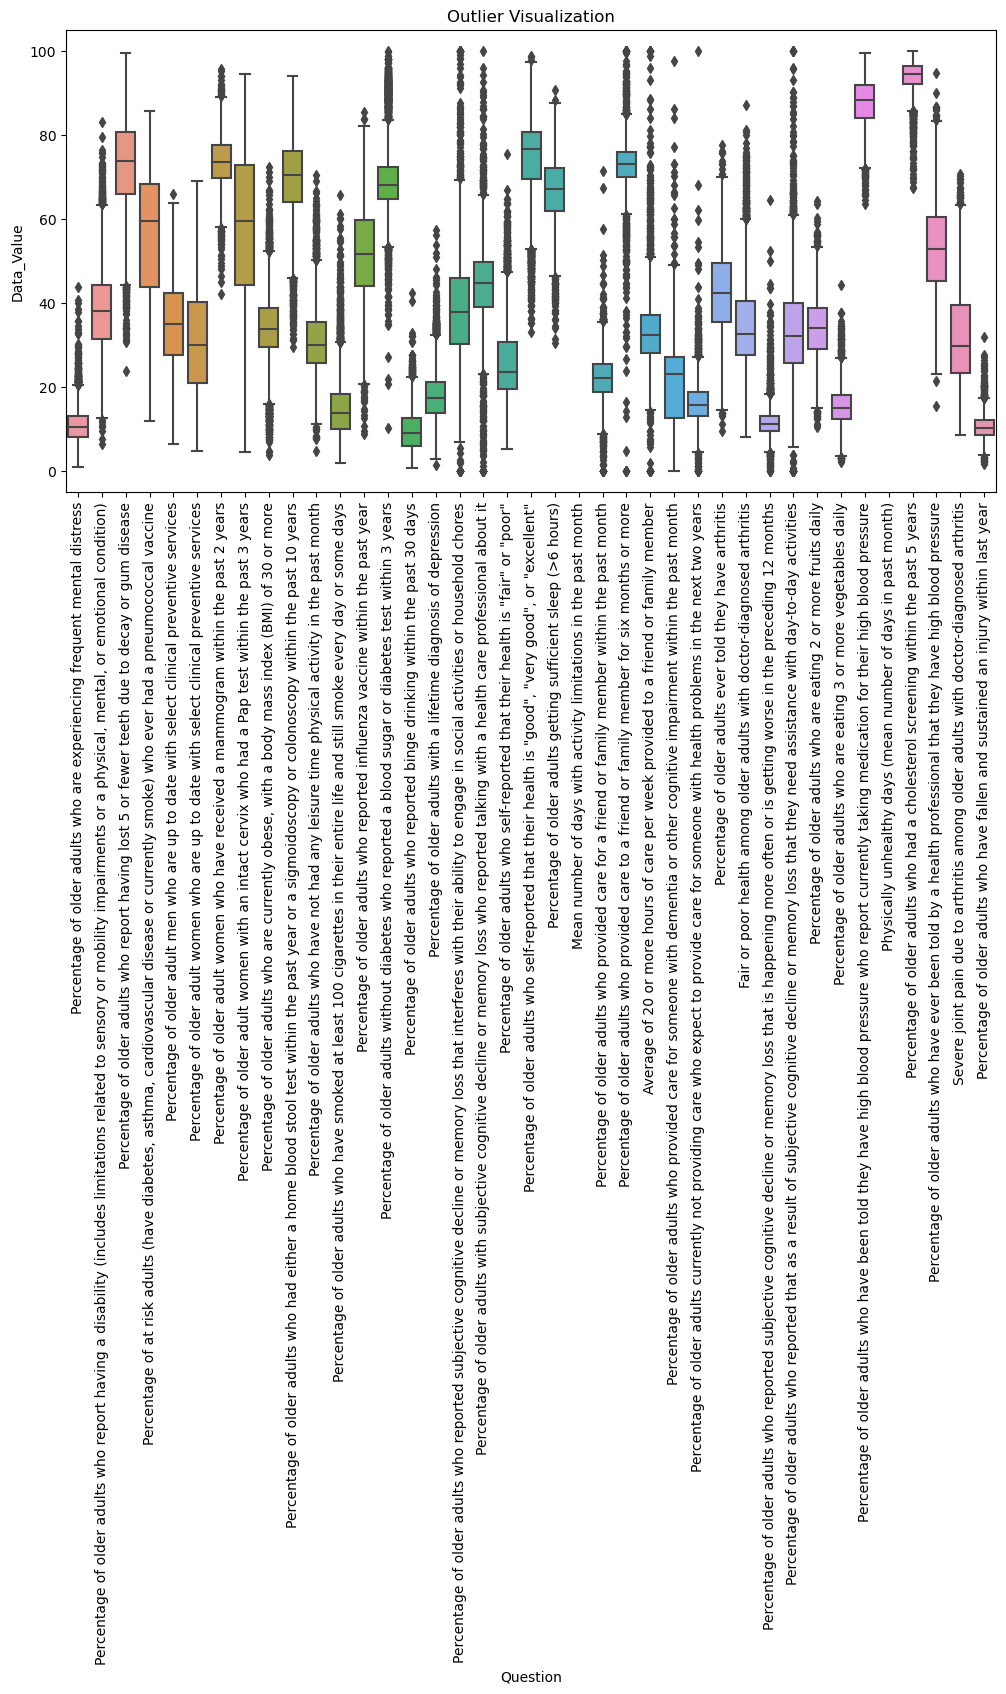

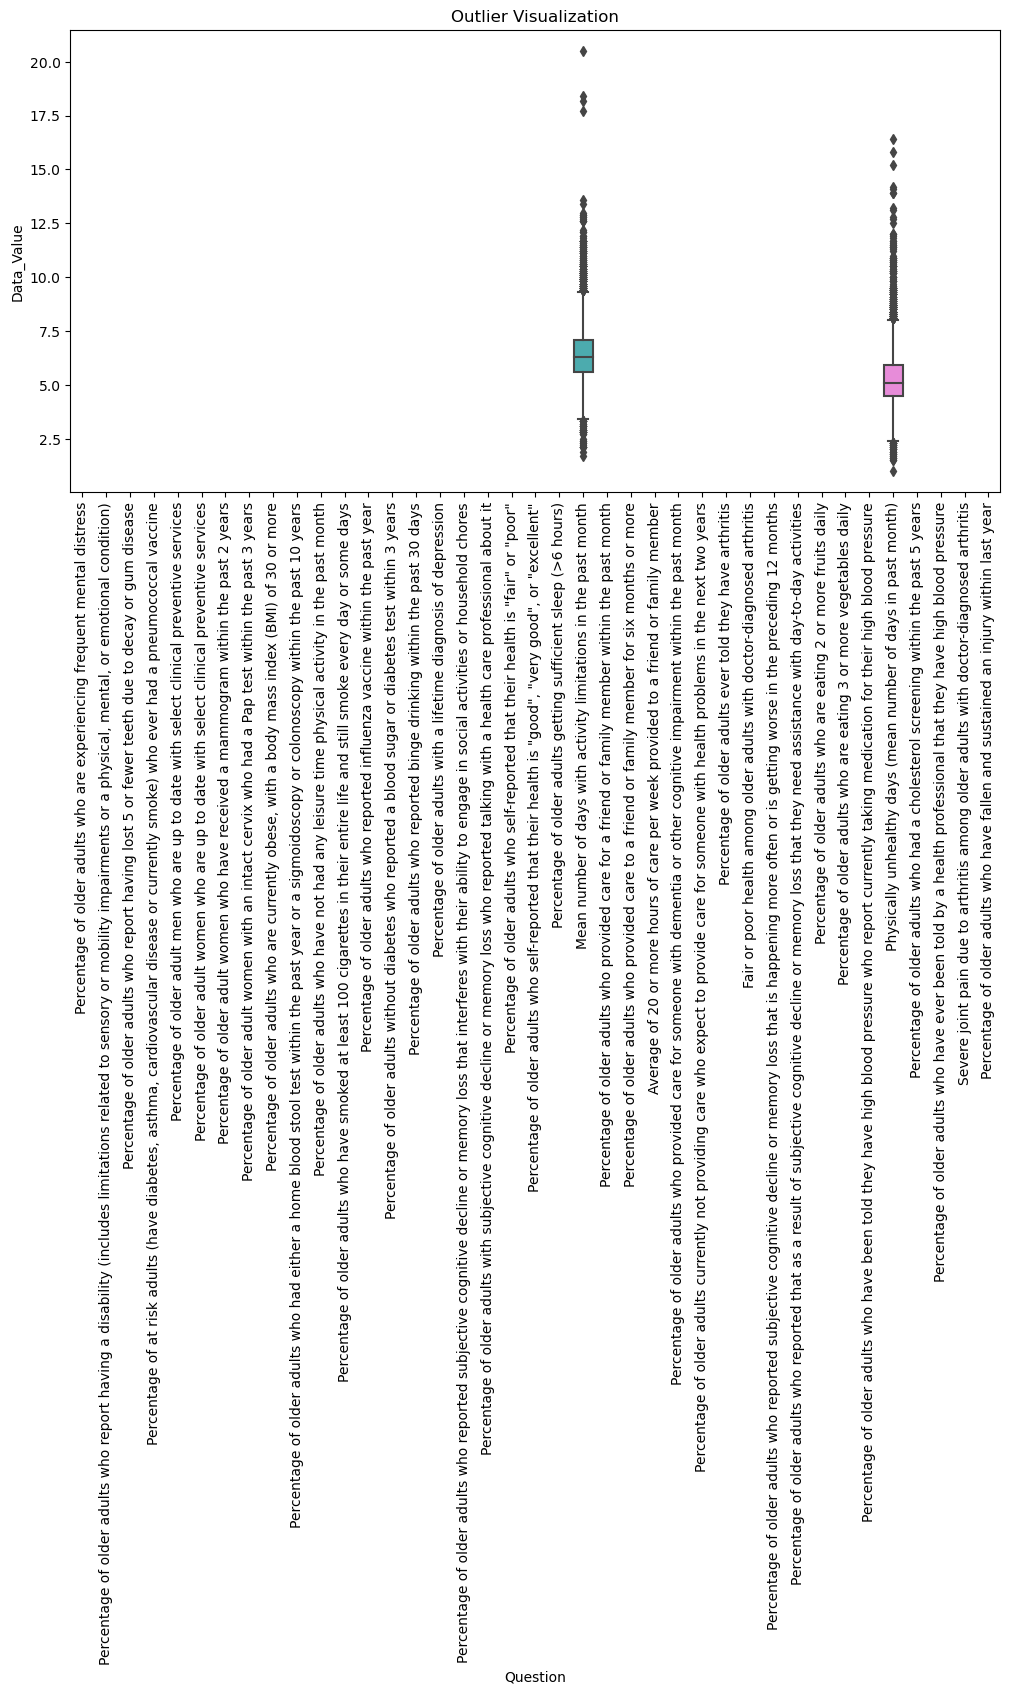

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1, x='Question', y=df1_percent)
plt.xticks(rotation=90)
plt.title('Outlier Visualization')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=df1, x='Question', y=df1_number)
plt.xticks(rotation=90)
plt.title('Outlier Visualization')

plt.show()

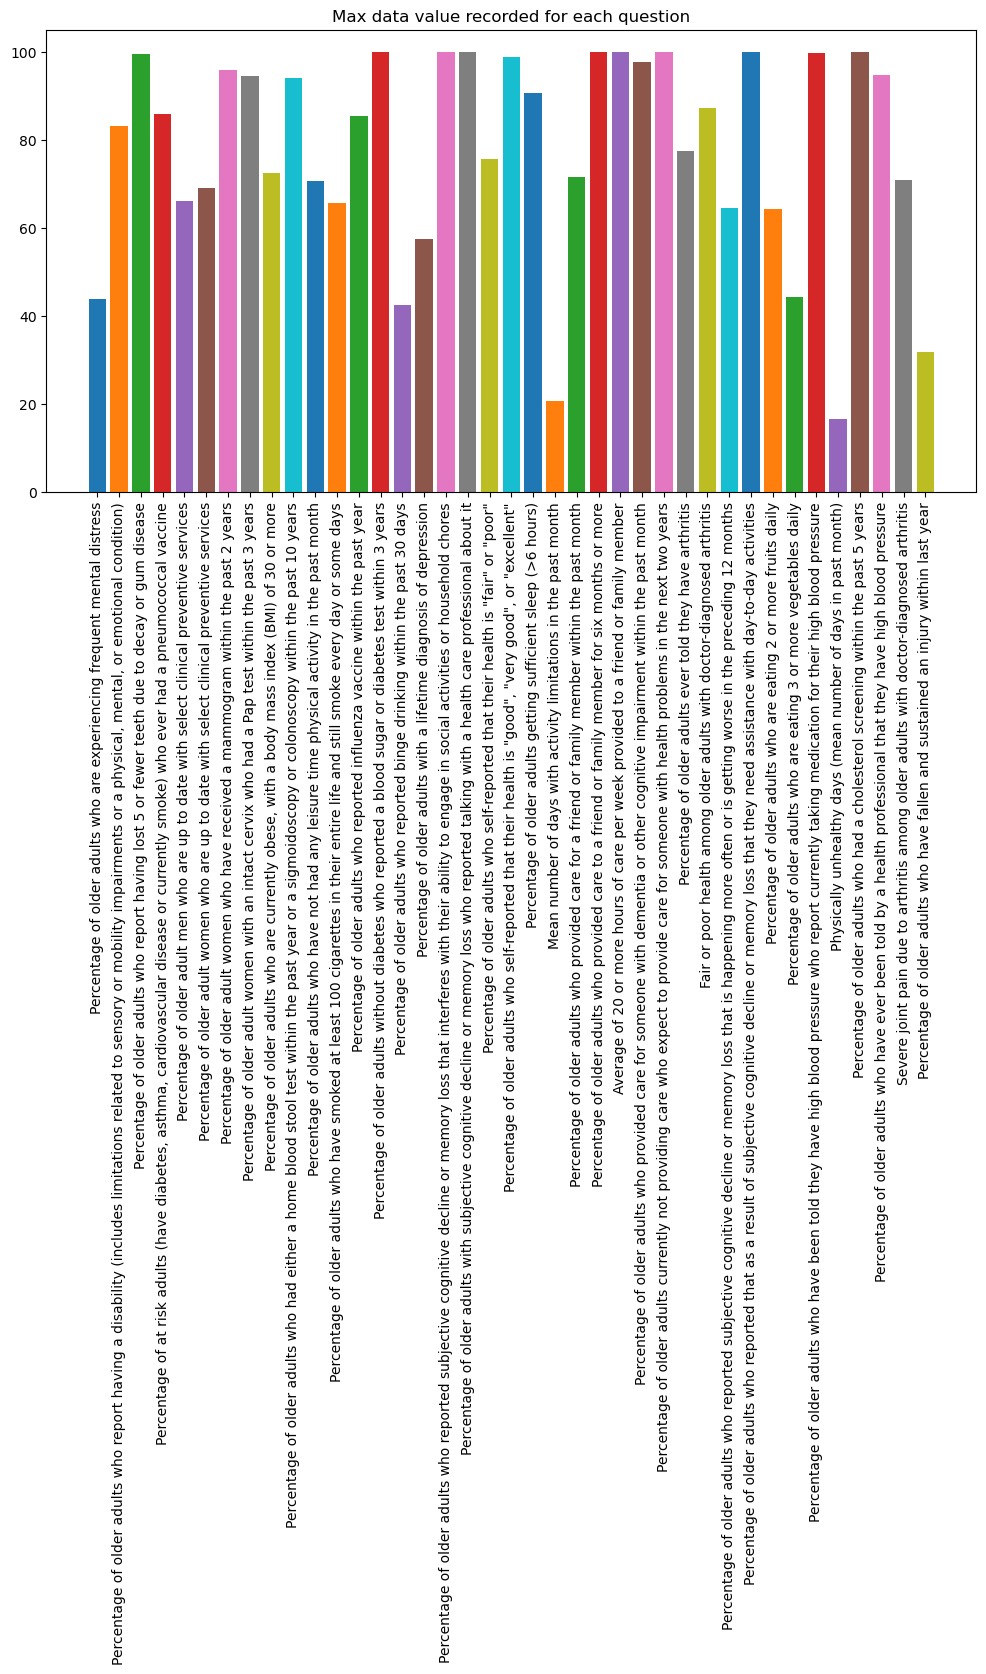

In [38]:
qdata0 = df1[df1['Question'] == unique_questions[0]]['Data_Value'].max()
qdata1 = df1[df1['Question'] == unique_questions[1]]['Data_Value'].max()
qdata2 = df1[df1['Question'] == unique_questions[2]]['Data_Value'].max()
qdata3 = df1[df1['Question'] == unique_questions[3]]['Data_Value'].max()
qdata4 = df1[df1['Question'] == unique_questions[4]]['Data_Value'].max()
qdata5 = df1[df1['Question'] == unique_questions[5]]['Data_Value'].max()
qdata6 = df1[df1['Question'] == unique_questions[6]]['Data_Value'].max()
qdata7 = df1[df1['Question'] == unique_questions[7]]['Data_Value'].max()
qdata8 = df1[df1['Question'] == unique_questions[8]]['Data_Value'].max()
qdata9 = df1[df1['Question'] == unique_questions[9]]['Data_Value'].max()
qdata10 = df1[df1['Question'] == unique_questions[10]]['Data_Value'].max()
qdata11 = df1[df1['Question'] == unique_questions[11]]['Data_Value'].max()
qdata12 = df1[df1['Question'] == unique_questions[12]]['Data_Value'].max()
qdata13 = df1[df1['Question'] == unique_questions[13]]['Data_Value'].max()
qdata14 = df1[df1['Question'] == unique_questions[14]]['Data_Value'].max()
qdata15 = df1[df1['Question'] == unique_questions[15]]['Data_Value'].max()
qdata16 = df1[df1['Question'] == unique_questions[16]]['Data_Value'].max()
qdata17 = df1[df1['Question'] == unique_questions[17]]['Data_Value'].max()
qdata18 = df1[df1['Question'] == unique_questions[18]]['Data_Value'].max()
qdata19 = df1[df1['Question'] == unique_questions[19]]['Data_Value'].max()
qdata20 = df1[df1['Question'] == unique_questions[20]]['Data_Value'].max()
qdata21 = df1[df1['Question'] == unique_questions[21]]['Data_Value'].max()
qdata22 = df1[df1['Question'] == unique_questions[22]]['Data_Value'].max()
qdata23 = df1[df1['Question'] == unique_questions[23]]['Data_Value'].max()
qdata24 = df1[df1['Question'] == unique_questions[24]]['Data_Value'].max()
qdata25 = df1[df1['Question'] == unique_questions[25]]['Data_Value'].max()
qdata26 = df1[df1['Question'] == unique_questions[26]]['Data_Value'].max()
qdata27 = df1[df1['Question'] == unique_questions[27]]['Data_Value'].max()
qdata28 = df1[df1['Question'] == unique_questions[28]]['Data_Value'].max()
qdata29 = df1[df1['Question'] == unique_questions[29]]['Data_Value'].max()
qdata30 = df1[df1['Question'] == unique_questions[30]]['Data_Value'].max()
qdata31 = df1[df1['Question'] == unique_questions[31]]['Data_Value'].max()
qdata32 = df1[df1['Question'] == unique_questions[32]]['Data_Value'].max()
qdata33 = df1[df1['Question'] == unique_questions[33]]['Data_Value'].max()
qdata34 = df1[df1['Question'] == unique_questions[34]]['Data_Value'].max()
qdata35 = df1[df1['Question'] == unique_questions[35]]['Data_Value'].max()
qdata36 = df1[df1['Question'] == unique_questions[36]]['Data_Value'].max()
qdata37 = df1[df1['Question'] == unique_questions[37]]['Data_Value'].max()
qdata38 = df1[df1['Question'] == unique_questions[38]]['Data_Value'].max()

#print(questions_data)
#sns.countplot(data = qdata, x=unique_questions[0])
plt.figure(figsize=(12, 6))
plt.bar(unique_questions[0], qdata0)
plt.bar(unique_questions[1], qdata1)
plt.bar(unique_questions[2], qdata2)
plt.bar(unique_questions[3], qdata3)
plt.bar(unique_questions[4], qdata4)
plt.bar(unique_questions[5], qdata5)
plt.bar(unique_questions[6], qdata6)
plt.bar(unique_questions[7], qdata7)
plt.bar(unique_questions[8], qdata8)
plt.bar(unique_questions[9], qdata9)
plt.bar(unique_questions[10], qdata10)
plt.bar(unique_questions[11], qdata11)
plt.bar(unique_questions[12], qdata12)
plt.bar(unique_questions[13], qdata13)
plt.bar(unique_questions[14], qdata14)
plt.bar(unique_questions[15], qdata15)
plt.bar(unique_questions[16], qdata16)
plt.bar(unique_questions[17], qdata17)
plt.bar(unique_questions[18], qdata18)
plt.bar(unique_questions[19], qdata19)
plt.bar(unique_questions[20], qdata20)
plt.bar(unique_questions[21], qdata21)
plt.bar(unique_questions[22], qdata22)
plt.bar(unique_questions[23], qdata23)
plt.bar(unique_questions[24], qdata24)
plt.bar(unique_questions[25], qdata25)
plt.bar(unique_questions[26], qdata26)
plt.bar(unique_questions[27], qdata27)
plt.bar(unique_questions[28], qdata28)
plt.bar(unique_questions[29], qdata29)
plt.bar(unique_questions[30], qdata30)
plt.bar(unique_questions[31], qdata31)
plt.bar(unique_questions[32], qdata32)
plt.bar(unique_questions[33], qdata33)
plt.bar(unique_questions[34], qdata34)
plt.bar(unique_questions[35], qdata35)
plt.bar(unique_questions[36], qdata36)
plt.bar(unique_questions[37], qdata37)
plt.bar(unique_questions[38], qdata38)

plt.title('Max data value recorded for each question')
plt.xticks(rotation=90)
plt.show()

In [52]:
qmax = df1[df1['Data_Value'] == 100]['Question'].unique()
print(qmax)

['Percentage of older adults without diabetes who reported a blood sugar or diabetes test within 3 years'
 'Average of 20 or more hours of care per week provided to a friend or family member'
 'Percentage of older adults who reported that as a result of subjective cognitive decline or memory loss that they need assistance with day-to-day activities'
 'Percentage of older adults who provided care to a friend or family member for six months or more'
 'Percentage of older adults who reported subjective cognitive decline or memory loss that interferes with their ability to engage in social activities or household chores'
 'Percentage of older adults with subjective cognitive decline or memory loss who reported talking with a health care professional about it'
 'Percentage of older adults currently not providing care who expect to provide care for someone with health problems in the next two years']


By isolating the questions where 100% of people agreed with them at one point in time, we can analyze what this tells us about the data. For example, the vast majority of older adults provide care, or plan to provide care, to others with health problems. Maybe this correlates to the vast majority of older adults with cognitive decline or memory loss. So from grouping these numerical and categorical values, we can continue researching within the scope of the project. 

*I'm claiming at one point in time because these questions were asked during different years, so there are multiple data points corresponding to each question. So I plotted the largest numerical value that was recorded over the years

In [56]:
majority = df1[df1['Data_Value'] > 50]['Question'].unique()
print(majority)

['Percentage of older adults who report having a disability (includes limitations related to sensory or mobility impairments or a physical, mental, or emotional condition)'
 'Percentage of older adults who report having lost 5 or fewer teeth due to decay or gum disease'
 'Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine'
 'Percentage of older adult women who have received a mammogram within the past 2 years'
 'Percentage of older adults who had either a home blood stool test within the past year or a sigmoidoscopy or colonoscopy within the past 10 years'
 'Percentage of older adults who reported influenza vaccine within the past year'
 'Percentage of older adults without diabetes who reported a blood sugar or diabetes test within 3 years'
 'Percentage of older adults with subjective cognitive decline or memory loss who reported talking with a health care professional about it'
 'Percentage of older adult

Furthermore, the majority of the questions asked had greater than 50% of the adults agreeing to them at one point in time. From the overwhelming favor towards the questions asked, we can draw additional conclusions about correlations between categories. We could also analyze the questions that the majority of adults agreed to, and didn't agree to, and analyze factors such as age and weight. 

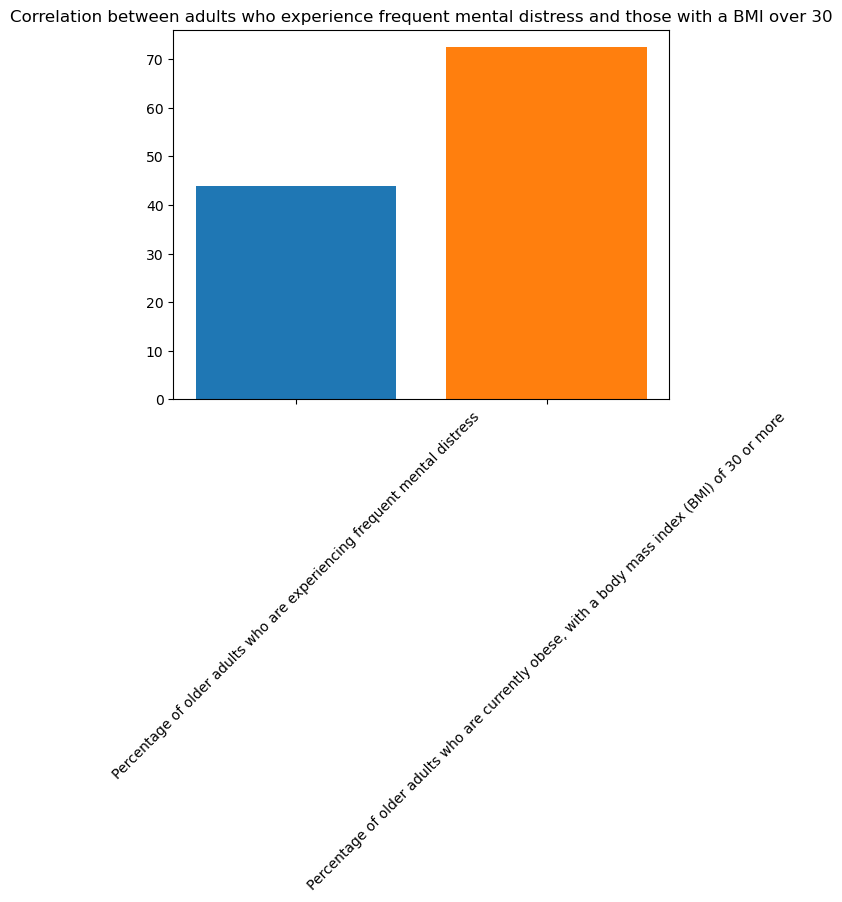

In [39]:
plt.bar(unique_questions[0], qdata0)
plt.bar(unique_questions[8], qdata8)
plt.title('Correlation between adults who experience frequent mental distress and those with a BMI over 30')
plt.xticks(rotation=45)
plt.show()


This data set would be useful in mapping trends as the patients get older. In this EDA, I explored the types of questions asked, but it would be interesting to see how the answers change as the patients get older. This information gained could be important in prevention techniques, such as ways to avoid memory loss as you get older. Another part of the data I looked at, was the adults who experienced frequent mental distress and those who are currently obese. I would be interested to see how BMI correlates to other factors such as memory loss or depression. To get some of these insights, I believe clustering would be beneficial to observe how the data relies on each other. 

This data set was recorded over a couple of years, so researchers could detect anomolies on patient answers year-by-year. For instance, if there was a high increase in the percentage of patients with diagnosed depression during 2020, it would be helpful to interpret that data within the scope of COVID and the economy at that time. 

Throughout exploring this data set, one challenge I encountered was that some of the data values were recorded in different units (percentage and numerical value). To get the information I wanted, I realized that I had to split the data up for each unit to accurately interpret the central tendency measurements. Additionally, the dataset was much larger than I realized (120MB), so I couldn't read all my data at once and instead had to read the heads of each category to understand the general sequence of the data. The things I found interesting were the variety of questions asked. With 39 unique questions, there is a lot of information to obtain from this dataset if further clustering analysis is conducted. 